# Voorbeeldopdracht week 10
Deze week gaan we de analyses van week 1 voortzetten door actief op zoek te gaan naar verbanden en analyses te doen die moeten leiden tot het beantwoorden van een onderzoeksvraag.
We beginnen met het importeren van een dataset

In [4]:
import pandas as pd
data = pd.read_excel('Dataset1 week 10.xlsx')
data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_becoming_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Responded to deal
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,0


Dit is een dataset met klantgegevens. De kolommen zijn
* Geboortejaar
* Opleidingsniveau
* Burgelijke staat
* Inkomen
* Aantal kinderen in huis
* Aantal tieners in huis
* Datum waarop een klant voor het eerst klant is geworden
* Aantal dagen sinds laatste aankoop
* Hoeveelheid geld uitgegeven aan wijn in de laatste 2 jaar
* Hoeveelheid geld uitgegeven aan fruit de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan vlees de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan vis de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan snoep de afgelopen 2 jaar
* Hoeveelheid geld uitgegeven aan goud de afgelopen 2 jaar
* Indicator of de persoon de laatste keer mee deed aan een actie.

Het bedrijf wil uiteindelijk weten welke klanten potentieel gevoelig zijn voor een actie


Bij een dergelijke analyse kunnen allerlei deelvragen bepaald worden. Hieronder wordt een aantal voorbeelden uitgewerkt

1. Geven mensen met een hoger opleidingsniveau meer uit?

In [5]:
# Groeperen per opleidingsniveau. Som van uitgaven
data.groupby(['Education'])[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
2n Cycle,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015
Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
Graduation,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157
Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
PhD,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700


Zoals je ziet best wel grote verschillen

2. Geven huishoudens met kinderen meer uit aan snoep?

In [6]:
data.groupby(['Kidhome', 'Teenhome'])['MntSweetProducts'].mean().reset_index()


,Kidhome,Teenhome,MntSweetProducts
0,0,0,53.061129
1,0,1,28.700800
2,0,2,19.133333
3,1,0,9.850895
4,1,1,7.521390
5,1,2,11.909091
6,2,0,8.058824
7,2,1,2.870968


Opvallend genoeg zien we dat dat niet het geval is, kunnen we verklaren hoe dat komt? Daarvoor kunnen we kijken hoe de groep zonder kinderen op andere indicatoren verschilt van de andere groepen. Hiervoor hebben we ene nieuwe kolom nodig: wel of geen kinderen

In [7]:
# Nieuwe kolom maken
data['Kinderen'] = data.apply(lambda x: 1 if x['Kidhome'] + x['Teenhome'] > 0 else 0, axis=1)
# Gemiddelde van alle kolommen bekijken
data.groupby('Kinderen').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Responded to deal
Kinderen,,,,,,,,,,,,
0,1968.583072,65705.565561,0.000000,0.000000,49.086207,487.305643,52.357367,372.609718,76.547022,53.061129,64.148903,0.264890
1,1968.894507,46865.626027,0.621099,0.707865,49.118602,230.908240,15.925718,85.045568,21.985019,16.709114,36.006242,0.102996


Een aantal dingen valt op. We zien dat mensen zonder kinderen gemiddeld een hoger inkomen hebben en dat ze in algemene zin dus veel meer uitgaven. Dit valt ook op als we kijken naar het opleidingsniveau

In [8]:
pd.pivot_table(data, index='Education', columns=['Kinderen'], values='Year_Birth', aggfunc='count')

Kinderen,0,1
Education,,
2n Cycle,64,139
Basic,17,37
Graduation,321,806
Master,102,268
PhD,134,352


### __________________

- Wij hebben hier een data met uitgaven per categorie die gekoppeld zijn aan de klantinformatie,
- Het gaat om een te goed gestructrureerde data van 2 jaar om een enquette resulaat te kunnen zijn.

Met die redenen neem ik aan dat dit om een webwinkel gaat. (Kan ook meerdere webwinkels zijn , dat sluit ik niet uit)
En we weten niet of dit is de enige plek waar deze mensen hun boodschappen doen ook als het om een supermarkt gaat.

Als de families met kinderen minder gebruik maken van deze webwinkel maar meer van de locale supermarkt of een andere webwinkel, dat zou een andere richting geven aan de analyse.

Dus ik denk niet dat de mensen zonder kinderen meer geld uitgeven aan snoep en ik denk niet dat de mensen zonder kinderen een hoger inkomen hebben of dat te maken heeft met opleidingsniveau aan de hand van deze data.

Ik denk alleen dat de mensen zonder kinderen meer uitgegeven hebben in deze webwinkel dan andere webwinkels of de lokale supermarkt.

Mijn analyse voor deze webwinkel zou meer in de richting zijn

- Om de webwinkel haar publiek leren kennen en welke producten moeten ze meer focussen, misschien voor de mogelijke aanbiedingen of product variates.

My approach would be ;


In [9]:
# wanna focus the age for now.
birth_year = data.groupby(['Year_Birth'])["Year_Birth"].count()

# adding new column for age. ## ytd
data["age"] = 2022 - data["Year_Birth"]
display(data["age"])

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: age, Length: 2240, dtype: int64

<AxesSubplot:>

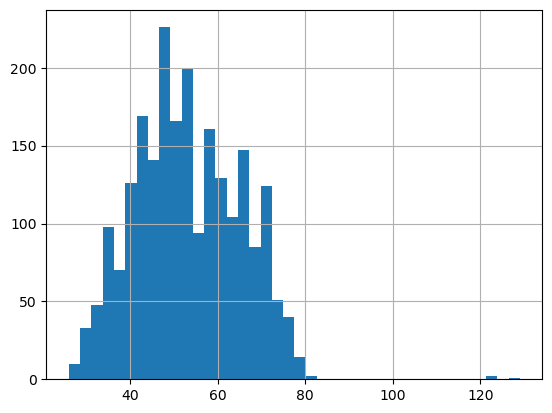

In [10]:
# checking if anything unusual
data["age"].hist(bins=40)



In [11]:
# there are few older than 120, lets check that one first.
data[data.age > 120]

# those can be typos but too many possibilities, 1893 could be 1983 or 1993 fe

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_becoming_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Responded to deal,Kinderen,age
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,0,1,122
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,0,1,129
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,0,0,123


In [12]:
# i wont drop those lines coz might need them later use but in my first attempt of analysis I wont use those 3 just in case.
tidy_data = data[data.age < 120]
print(f"Oldest = {tidy_data.age.max()}", end="")
print(f" and the youngest = {tidy_data.age.min()}")

Oldest = 82 and the youngest = 26


<AxesSubplot:>

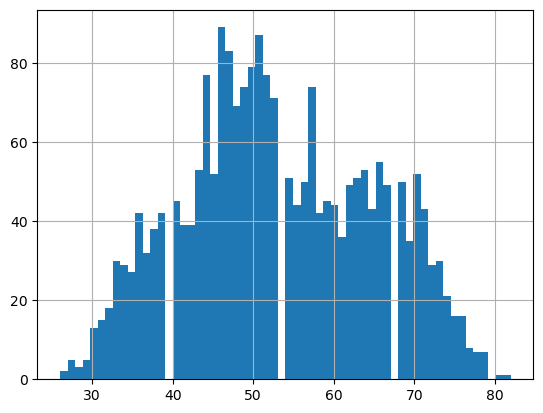

In [13]:
tidy_data["age"].hist(bins=60)
# i ll make sub age groups to have a better understand of the spendings

# 1 = Under 40
# 2 = Between 40-52
# 3 = Between 52-67
# 4 = Above 67

In [14]:
# I ll add those categories to a list to use as a new column.
# I chose a list and not a dictionary because I want it to be ordered like the columns. 

age_cat = []
for value in tidy_data.age:
    if value < 40:
        age_cat.append("Under 40")
    elif 40 <= value <52:
        age_cat.append("Between 40-52")
    elif 52 <= value <67:
        age_cat.append("Between 52-67")
    else:
        age_cat.append("Above 67")

In [15]:
# assigning list to a new column
tidy_data["age_cat"] = age_cat

tidy_data[["age","age_cat"]]

C:\Users\nurta\AppData\Local\Temp\ipykernel_10300\1621065467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data["age_cat"] = age_cat


,age,age_cat
0,65,Between 52-67
1,68,Above 67
2,57,Between 52-67
3,38,Under 40
4,41,Between 40-52
...,...,...
2235,55,Between 52-67
2236,76,Above 67
2237,41,Between 40-52
2238,66,Between 52-67


In [16]:
# checking average spendings per age category
tidy_data.groupby(["age_cat"])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
age_cat,,,,,,
Above 67,397.331507,26.449315,193.183562,43.619178,30.142466,51.917808
Between 40-52,250.389313,23.221374,145.744275,34.178117,24.678117,38.234097
Between 52-67,338.006369,28.388535,168.537580,38.343949,27.084076,46.075159
Under 40,242.096346,28.491694,186.126246,36.724252,29.544850,43.810631


In [17]:
# checking total spendings per age category because it is about 2 year data and even one time customer effects the average.
tidy_data.groupby(["age_cat"])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
age_cat,,,,,,
Above 67,145026,9654,70512,15921,11002,18950
Between 40-52,196806,18252,114555,26864,19397,30052
Between 52-67,265335,22285,132302,30100,21261,36169
Under 40,72871,8576,56024,11054,8893,13187


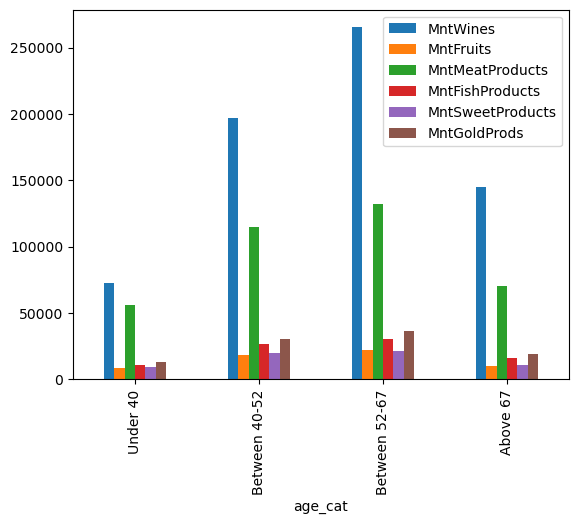

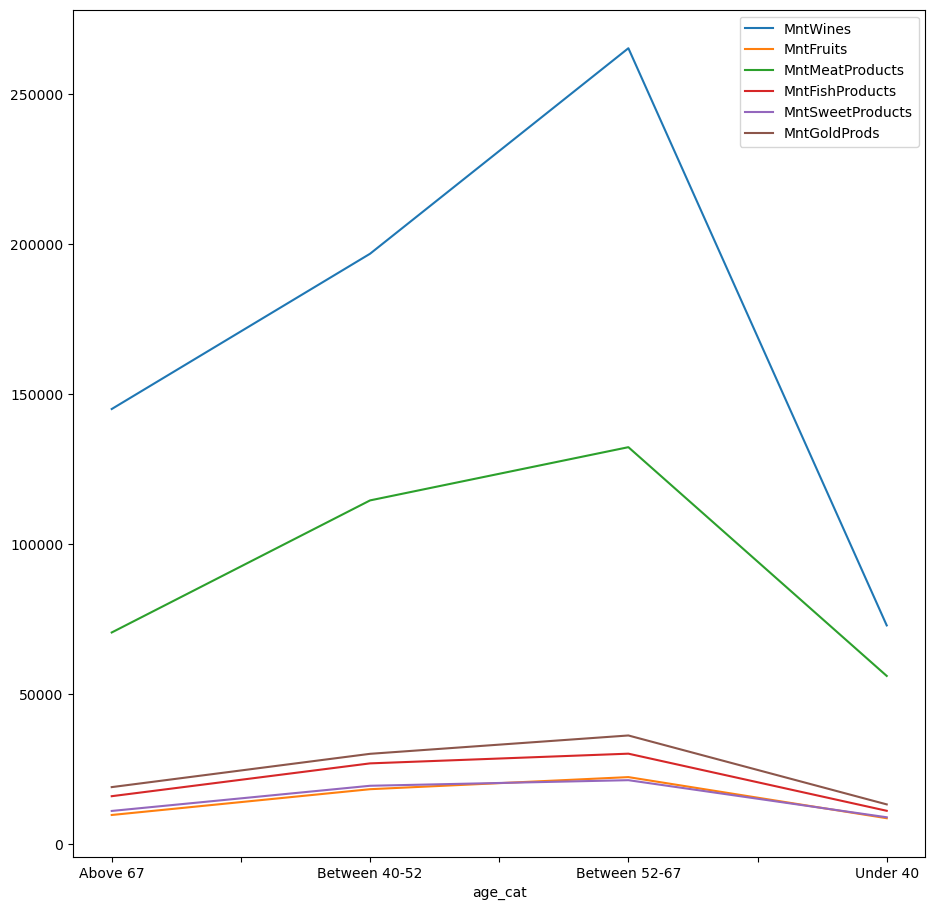

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = tidy_data.groupby(["age_cat"])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
## add a bar chart

# sns.countplot(kind="bar",  data=df2, x="age_cat")
order= ["Under 40", "Between 40-52", "Between 52-67", "Above 67"]
df2.loc[order].plot(kind='bar')
df2.plot(figsize=(11,11))

plt.show()

So far my suggestion to the company would be to focus on 35-70 age group as advertisement focus group, with additional variations and/or promotions on wine and meat products. 

My next step would be checking the `rating and response to deal` columns and their correlations with total spendings and age groups to have more insight about the customer behaviour to answer the customers question:
#### Het bedrijf wil uiteindelijk weten welke klanten potentieel gevoelig zijn voor een actie

In [19]:
tidy_data.groupby(["age_cat"])["age_cat"].count()

age_cat
Above 67         365
Between 40-52    786
Between 52-67    785
Under 40         301
Name: age_cat, dtype: int64

In [20]:
tidy_data["Total"] = tidy_data['MntWines'] + tidy_data['MntFruits'] + tidy_data['MntMeatProducts'] + tidy_data['MntFishProducts'] + tidy_data['MntSweetProducts'] + tidy_data['MntGoldProds']

C:\Users\nurta\AppData\Local\Temp\ipykernel_10300\871846028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data["Total"] = tidy_data['MntWines'] + tidy_data['MntFruits'] + tidy_data['MntMeatProducts'] + tidy_data['MntFishProducts'] + tidy_data['MntSweetProducts'] + tidy_data['MntGoldProds']


In [21]:
tidy_data["Total"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total, Length: 2237, dtype: int64

In [22]:
tidy_data["Focus_perc"] = (tidy_data['MntWines'] + tidy_data['MntFruits'] ) / tidy_data["Total"]

C:\Users\nurta\AppData\Local\Temp\ipykernel_10300\3347845146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tidy_data["Focus_perc"] = (tidy_data['MntWines'] + tidy_data['MntFruits'] ) / tidy_data["Total"]


In [23]:
tidy_data

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_becoming_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Responded to deal,Kinderen,age,age_cat,Total,Focus_perc
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1,0,65,Between 52-67,1617,0.447124
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,0,1,68,Above 67,27,0.444444
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,0,0,57,Between 52-67,776,0.612113
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,0,1,38,Under 40,53,0.283019
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,0,1,41,Between 40-52,422,0.511848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,0,1,55,Between 52-67,1341,0.560776
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,0,1,76,Above 67,444,0.914414
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,0,0,41,Between 40-52,1241,0.770346
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,0,1,66,Between 52-67,843,0.543298


In [24]:
tidy_data["age_cat"].value_counts()

#seeing our data is not well spread going back to average calculations.

Between 40-52    786
Between 52-67    785
Above 67         365
Under 40         301
Name: age_cat, dtype: int64

<AxesSubplot:xlabel='age_cat'>

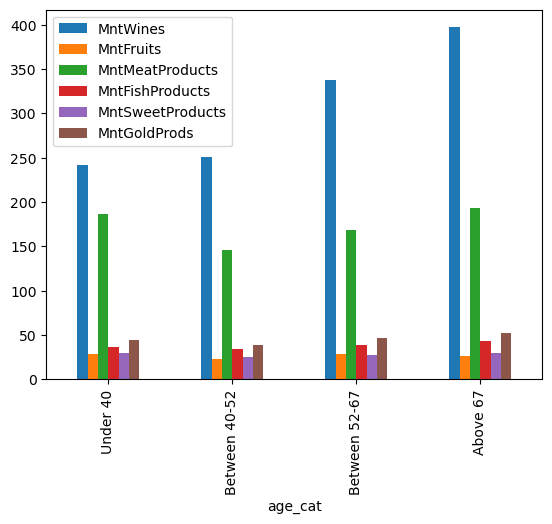

In [54]:
# checking average spendings per age again
df3 = tidy_data.groupby(["age_cat"])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
order= ["Under 40", "Between 40-52", "Between 52-67", "Above 67"]
df3.loc[order].plot(kind='bar')

In [26]:
# But this time we see a different spendings compared to total ones. 
# Thats because there is more data for people between 40-67 than the rest.

# We can use these numbers to divide total spendings by category by the amount of people in each category.
# Between 40-52    786
# Between 52-67    785
# Above 67         365
# Under 40         301

tidy_data.groupby("age_cat")[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
age_cat,,,,,,
Above 67,145026,9654,70512,15921,11002,18950
Between 40-52,196806,18252,114555,26864,19397,30052
Between 52-67,265335,22285,132302,30100,21261,36169
Under 40,72871,8576,56024,11054,8893,13187


In [27]:
type(tidy_data.groupby(["age_cat"])["age_cat"].count())
tidy_data.groupby(["age_cat"])["age_cat"].count()

age_cat
Above 67         365
Between 40-52    786
Between 52-67    785
Under 40         301
Name: age_cat, dtype: int64

In [28]:
# Trying to make weighted spending categories by dividing spendings per category
# to the numbers per category which might give a better insight if we can plot that.

# tidy_data["wine"] = tidy_data.groupby(["age_cat"])['MntWines'].sum() / tidy_data.groupby(["age_cat"]).count()
# tidy_data["wine"]

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
tidy_data["Responded to deal"].value_counts()

0    1903
1     334
Name: Responded to deal, dtype: int64

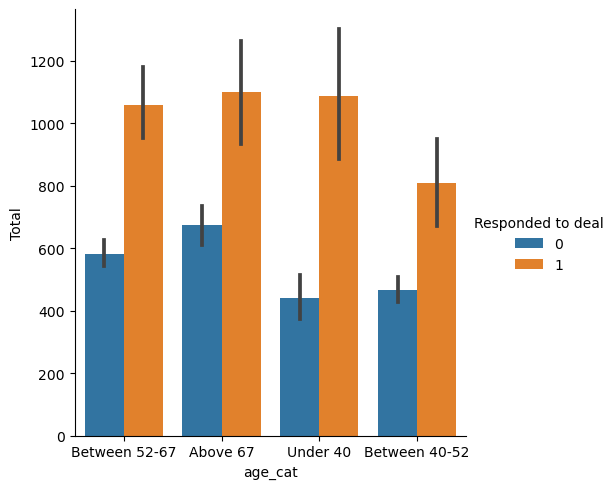

In [69]:
from numpy import mean
sns.catplot(kind="bar", x="age_cat", y="Total", data=tidy_data, hue="Responded to deal", estimator=mean)
plt.show()

In [30]:
responded = tidy_data[tidy_data["Responded to deal"] == 1]
responded.shape

(334, 20)

In [31]:
weighted_total = tidy_data.groupby("age_cat")["Total"].sum() / tidy_data.groupby(["age_cat"])["age_cat"].count()
weighted_total

age_cat
Above 67         742.643836
Between 40-52    516.445293
Between 52-67    646.435669
Under 40         566.794020
dtype: float64

In [44]:
weight_tot_resp = responded.groupby("age_cat")["Total"].sum() / responded.groupby(["age_cat"])["age_cat"].count()
weight_tot_resp 

age_cat
Above 67         1099.086207
Between 40-52     808.312500
Between 52-67    1060.490566
Under 40         1087.913793
dtype: float64

In [45]:
# Age group between 40-52 is not responding that well to deals for the money they spend. 
# Our advertisement campaign might focus on that age group. 

In [ ]:
#undersampling